In [25]:
from teltrace.load import file_read
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel
import numpy as np
from teltrace.fit import fit_voigt, plot_fit_voigt


In [26]:
filepath = "../data/Source_file_METEC_04NOV_2021_methane_background.csv"

spectrum = file_read(filepath=filepath)
print(spectrum)
print(spectrum.columns)




       Wavenumber  Intensity
0     6002.932793   0.114082
1     6002.932638   0.114254
2     6002.932479   0.114432
3     6002.932324   0.114394
4     6002.932166   0.114453
...           ...        ...
4995  6002.151918   0.011916
4996  6002.151759   0.011867
4997  6002.151604   0.011884
4998  6002.151446   0.011698
4999  6002.151291   0.011853

[5000 rows x 2 columns]
Index(['Wavenumber', 'Intensity'], dtype='object')


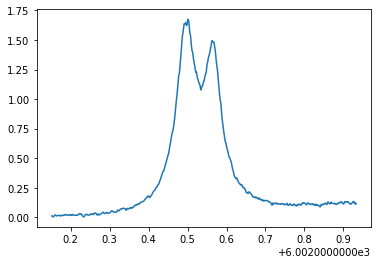

In [27]:
plt.plot(spectrum["Wavenumber"],spectrum["Intensity"])
plt.show()

[6002.534122 6002.533964 6002.533809 ... 6002.151604 6002.151446
 6002.151291]


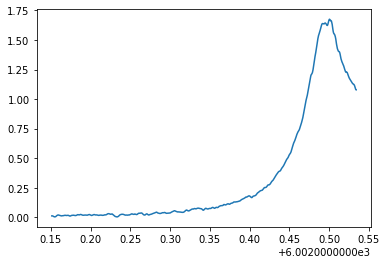

In [28]:
x = spectrum['Wavenumber'].values
y = spectrum['Intensity'].values
# print(x)
# print(y)
x_crop = x[2550:]
print(x_crop)
y_crop = y[2550:]
# %matplotlib
plt.plot(x_crop,y_crop)
# plt.plot(x,y+1)
plt.show()

In [29]:
def index_of(arrval, value):
    """Return index of array *at or below* value."""
    if value < min(arrval):
        return 0
    return max(np.where(arrval <= value)[0])


[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 4999
    # variables        = 3
    chi-square         = 65.1563223
    reduced chi-square = 0.01304170
    Akaike info crit   = -21690.6789
    Bayesian info crit = -21671.1280
    R-squared          = 0.93552034
[[Variables]]
    amplitude:  0.27017711 +/- 0.00105528 (0.39%) (init = 0.4570115)
    center:     6002.52604 +/- 3.3993e-04 (0.00%) (init = 6002.528)
    sigma:      0.03764540 +/- 2.1858e-04 (0.58%) (init = 0.03947743)
    gamma:      0.03764540 +/- 2.1858e-04 (0.58%) == 'sigma'
    fwhm:       0.13557203 +/- 7.8718e-04 (0.58%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     1.49788469 +/- 0.00695274 (0.46%) == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) = +0.6046
    C(center, sigma)    = -

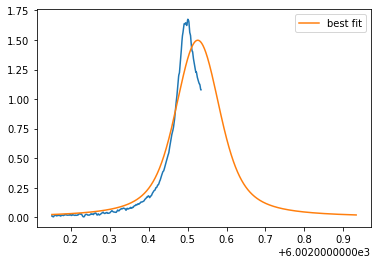

In [30]:
idx2 = index_of(x,6002.55)

mod = VoigtModel()

pars = mod.guess(y[:idx2],x = x[:idx2])

out = mod.fit(y[:idx2], pars, x=x[:idx2])

print(out.fit_report(min_correl=0.25))
fig, axes = plt.subplots()
axes.plot(x_crop, y_crop)
# axes.plot(x_crop, init, '--', label='initial fit')
axes.plot(x[:idx2], out.best_fit, '-', label='best fit')
axes.legend()

Parameters([('v1_amplitude', <Parameter 'v1_amplitude', value=0.45701147336856685, bounds=[-inf:inf]>), ('v1_center', <Parameter 'v1_center', value=6002.527634259639, bounds=[-inf:inf]>), ('v1_sigma', <Parameter 'v1_sigma', value=0.03947742500020013, bounds=[0.0:inf]>), ('v1_gamma', <Parameter 'v1_gamma', value=0.03947742500020013, bounds=[-inf:inf], expr='v1_sigma'>), ('v1_fwhm', <Parameter 'v1_fwhm', value=0.142169681072995, bounds=[-inf:inf], expr='1.0692*v1_gamma+sqrt(0.8664*v1_gamma**2+5.545083*v1_sigma**2)'>), ('v1_height', <Parameter 'v1_height', value=2.416128605040051, bounds=[-inf:inf], expr='(v1_amplitude/(max(1e-15, v1_sigma*sqrt(2*pi))))*wofz((1j*v1_gamma)/(max(1e-15, v1_sigma*sqrt(2)))).real'>)])
Parameters([('v1_amplitude', <Parameter 'v1_amplitude', value=0.45701147336856685, bounds=[-inf:inf]>), ('v1_center', <Parameter 'v1_center', value=6002.527634259639, bounds=[-inf:inf]>), ('v1_sigma', <Parameter 'v1_sigma', value=0.03947742500020013, bounds=[0.0:inf]>), ('v1_gamm

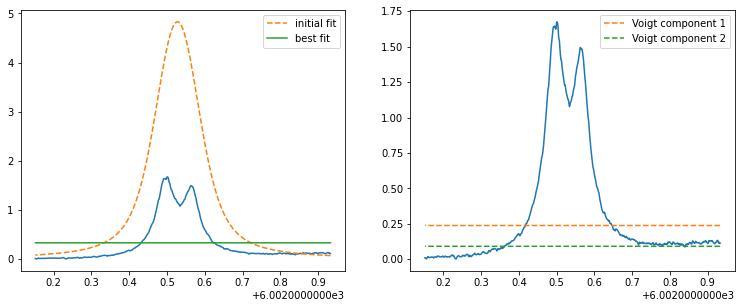

In [31]:
idx1 = index_of(x,6002.4)
idx2 = index_of(x,6002.55)


voigt1 = VoigtModel(prefix='v1_')
paras1 = voigt1.guess(y[:idx1],x=x[:idx1])

print(paras1)
voigt2 = VoigtModel(prefix='v2_')
paras1.update(voigt2.guess(y[:idx2],x=x[:idx2]))

print(paras1)
mod = voigt1 + voigt2 

init = mod.eval(paras1, x=x)
out = mod.fit(y, paras1, x=x)

print(out.fit_report(correl_mode='list'))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y)
axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y)
axes[1].plot(x, comps['v1_'], '--', label='Voigt component 1')
axes[1].plot(x, comps['v2_'], '--', label='Voigt component 2')
# axes[1].plot(x, comps['exp_'], '--', label='Exponential component')
axes[1].legend()

plt.show()
# <end exam

In [32]:
file = '../data/voigt_data.csv'

spectrum2 = file_read(filepath=file)

In [33]:
spectrum2

,Wavenumber,Intensity
0,-10.00000,0.251302
1,-9.97998,0.278045
2,-9.95996,0.363456
3,-9.93994,0.425346
4,-9.91992,0.284943
...,...,...
995,9.91992,0.392008
996,9.93994,0.465899
997,9.95996,0.404773
998,9.97998,0.479516


In [34]:
data = spectrum2.to_numpy()

In [35]:
x = data.T[0]
y = data.T[1]

Parameters([('amplitude', <Parameter 'amplitude', value=166.42051903048502, bounds=[-inf:inf]>), ('center', <Parameter 'center', value=0.010010011173184284, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', value=1.1581583, bounds=[0.0:inf]>), ('gamma', <Parameter 'gamma', value=1.1581583, bounds=[-inf:inf], expr='sigma'>), ('fwhm', <Parameter 'fwhm', value=4.170864643329886, bounds=[-inf:inf], expr='1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'>), ('height', <Parameter 'height', value=29.990293028749775, bounds=[-inf:inf], expr='(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'>)])
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 1000
    # variables        = 3
    chi-square         = 10.3675154
    reduced chi-square = 0.01039871
    Akaike info crit   = -4563.07788
    Bayesian info crit = -4548.35462
    R-squared          = 0.99972942
[[Variables

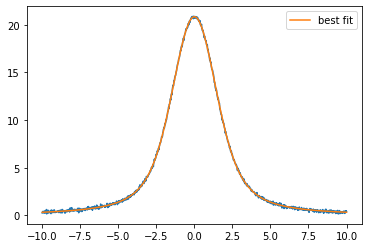

In [14]:
mod = VoigtModel()
paras = mod.guess(y, x=x)
print(paras)

out = mod.fit(y, paras, x=x)

print(out.fit_report(min_correl=0.25))
fig, axes = plt.subplots()
axes.plot(x, y)
axes.plot(x, out.best_fit, '-', label='best fit')
axes.legend()

In [15]:
popt,pcov = fit_voigt(x,y)

In [16]:
print(popt)

[8.27939577e-04 9.98300140e-01 1.00203836e+00 9.99599049e+01]


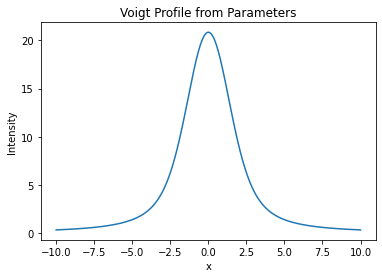

(array([8.27939577e-04, 9.98300140e-01, 1.00203836e+00, 9.99599049e+01]),
 <module 'matplotlib.pyplot' from '/Users/bensappey/opt/anaconda3/envs/kpic/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

In [17]:
plot_fit_voigt(x,y)

In [18]:
spec3 = file_read('../data/voigt_doublepeak_data.csv')

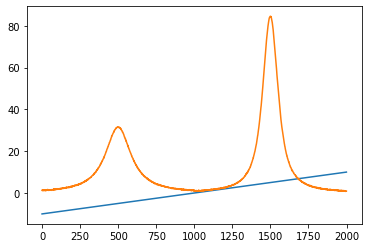

In [19]:
plt.plot(spec3)


In [20]:
from scipy.signal import find_peaks

In [21]:
peaks, _ = find_peaks(spec3['Intensity'].values,prominence=10)

In [22]:
peaks

array([ 496, 1501])

In [38]:
wvn = spec3['Wavenumber'].to_numpy()
intensity = spec3['Intensity'].to_numpy()
params,_ = plot_fit_voigt(wvn[peaks[0]-100:peaks[0]+100],intensity[peaks[0]-100:peaks[0]+100])
vals = []
figs = []
crop_val = 400
# for i in peaks:
#     wvn_crop = wvn[i-crop_val:i+crop_val]
#     intensity_crop = intensity[i-crop_val:i+crop_val]
#     plt.plot(wvn_crop,intensity_crop)
#     print(wvn_crop[np.argmax(intensity_crop)])
#     print(np.max(intensity_crop))
#     val,pcov = fit_voigt(wvn_crop,intensity_crop,bounds=None)
# #     # vals.append(val)
# #     # figs.append(fig)
    

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.